<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_07_derivadas.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 7
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por: 


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo [misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)

3. Calcular el campo para diferentes valores de z con z>0,,  empleando misc derivative. Construya un grafico de E vs z.

4. Entender la generalizacion de la siguiente función, y aplicarla para calcular la derivada.


```python
import numpy as np
from scipy import misc
def derivative(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] ## force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

assert isinstance(derivative(np.sin,1,dx=1E-6),float)

```

In [25]:
import numpy as np
import sympy as sym
import pandas as pd
from scipy import misc
from sympy import diff
import matplotlib.pyplot as plt
from scipy.misc import derivative

\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Haciendo $\~{V} = \frac{V}{kq_{tot}}, \quad$ resulta 

\begin{equation}
\~{V} = \frac{z}{\sqrt{z^2+R^2}}
\end{equation}

In [26]:
#Definimos la función reescalada del potencial electrostático

def fun(z: float,R:float) -> float:
    return z/(z**2+R**2)**(1/2)

In [27]:
# 1. La librearia sympy.

z=sym.Symbol('z')
R=sym.Symbol('R')

# 1.1. Derivada de la función respecto a z.
print(r'La derivada de la función respecto a z es:')
diff(fun(z,R),z)

La derivada de la función respecto a z es:


-1.0*z**2/(R**2 + z**2)**1.5 + (R**2 + z**2)**(-0.5)

In [28]:
print(r'Haciendo R=0.1e-3 [m] la derivada de la función respecto a z es:')
diff(fun(z,0.1),z)

Haciendo R=0.1e-3 [m] la derivada de la función respecto a z es:


-1.0*z**2/(z**2 + 0.01)**1.5 + (z**2 + 0.01)**(-0.5)

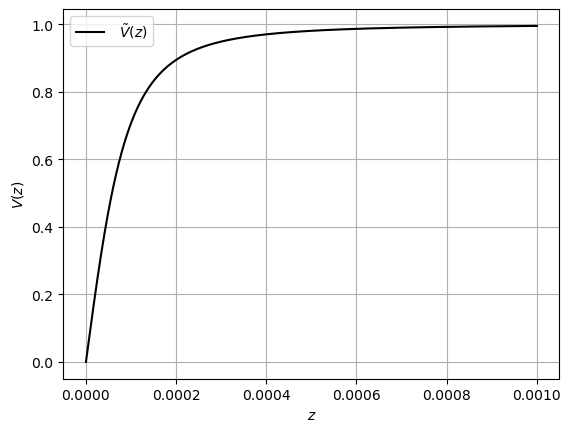

In [29]:
#Graficamos la función 
z = np.linspace(0,0.001,1000)
R = 0.1e-3
fig, ax = plt.subplots()

ax.plot(z, fun(z,R), 'k', label=' $\~{V}(z)$')
ax.set_xlabel('$z$')
ax.set_ylabel('$V(z)$')
ax.legend()
ax.grid()

plt.show()

In [30]:
#2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo misc.derivative

#Tomanos el valor de R y z en metros
R = 0.1e-3
z = 0.1e-3
dx = 0.0001 #Tamaño del paso para calcular la derivada

derivada = derivative(fun, z, dx, args=(R,))

print('---'*18)
print('El campo en el punto z=0.1e-3 [m] es: %.2f [V/m]'    % derivada)
print('---'*18)

------------------------------------------------------
El campo en el punto z=0.1e-3 [m] es: 4472.14 [V/m]
------------------------------------------------------


/tmp/ipykernel_26124/1711642862.py:8: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivada = derivative(fun, z, dx, args=(R,))


/tmp/ipykernel_26124/4026692855.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  E_z = [ derivative(fun, z, dx, args=(R,)) for z in np.linspace(0,0.001,1000) ]



------------------------------------------------------
Campo eléctrico para diferentes valores de z con z>0:
------------------------------------------------------

------------------------
            z        E_z
990  0.000991  10.324715
991  0.000992  10.293397
992  0.000993  10.262206
993  0.000994  10.231140
994  0.000995  10.200200
995  0.000996  10.169385
996  0.000997  10.138694
997  0.000998  10.108126
998  0.000999  10.077682
999  0.001000  10.047359
------------------------


--------------------
Grafico de E vs z:
--------------------


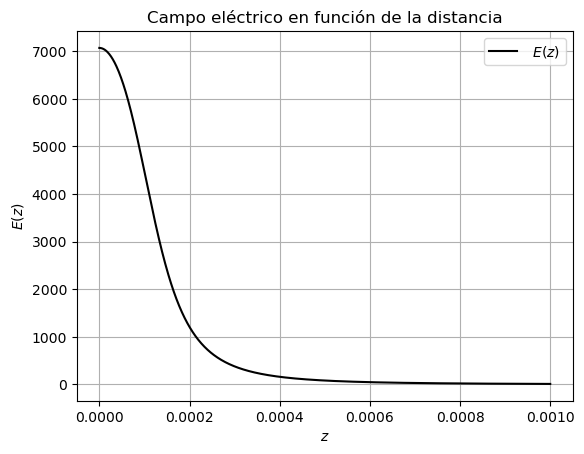

In [31]:
#3. Calcular el campo para diferentes valores de z con z>0,,  empleando misc derivative. Construya un grafico de E vs z.
E_z = [ derivative(fun, z, dx, args=(R,)) for z in np.linspace(0,0.001,1000) ]
z = np.linspace(0,0.001,1000)

#Mostramos los diferentes valores de E_z
print()
print('---'*18)
print('Campo eléctrico para diferentes valores de z con z>0:')
print('---'*18)

print()
print('---'*8)
dicc = {'z':z,'E_z':E_z}
print(pd.DataFrame(dicc).tail(10))
print('---'*8)
print()

print()
print('----'*5)
print('Grafico de E vs z:')
print('----'*5)

fig, ax = plt.subplots()
ax.plot(z, E_z, 'k', label=' $E(z)$')
ax.set_xlabel('$z$')
ax.set_ylabel('$E(z)$')
ax.set_title('Campo eléctrico en función de la distancia')
ax.legend()
ax.grid()
plt.show()

#ax.set_title('Campo eléctrico en función de la distancia')

4. Entender la generalizacion de la siguiente función, y aplicarla para calcular la derivada.


```python
import numpy as np
from scipy import misc
def derivative(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] ## force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

assert isinstance(derivative(np.sin,1,dx=1E-6),float)

```

Para solucionar el problema 4. Consideremos los diguientes potenciales electricos:

Potencial electrico de un anillo: 
\begin{equation*}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation*}

Haciendo $\~{V} = \frac{V}{kq_{tot}}, \quad$ resulta 

\begin{equation*}
\~{V} = \frac{z}{\sqrt{z^2+R^2}}
\end{equation*}

Potencial electrico de un disco: 

\begin{equation*}
V = \frac{q}{\pi R^2} 2 k \pi (\sqrt{z^2+R^2} - z)
\end{equation*}


Haciendo $\~{V} = \frac{V}{\frac{q}{\pi R^2} 2 k \pi}, \quad$ resulta 

\begin{equation*}
\~{V} = (\sqrt{z^2+R^2} - z)
\end{equation*}



In [32]:
#Definimos las funciones reescaladas para calcular el potencial electrostático de un anillo y un disco

def potencial(z, R, kq, select):
  if (select == 'anillo'):
    V = z * np.sqrt(z**2 + R**2)

  elif (select  == 'disco'):
    V= (np.sqrt(z**2 + R**2) - z)
  
  else:
    print('la palabra select debe ser igual a anillo o disco')
    V = None
    
  return V

/tmp/ipykernel_26124/3210591536.py:10: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  gradV= derivative(potencial, z, dx = 1E-6, args=(R,kq, select, ))


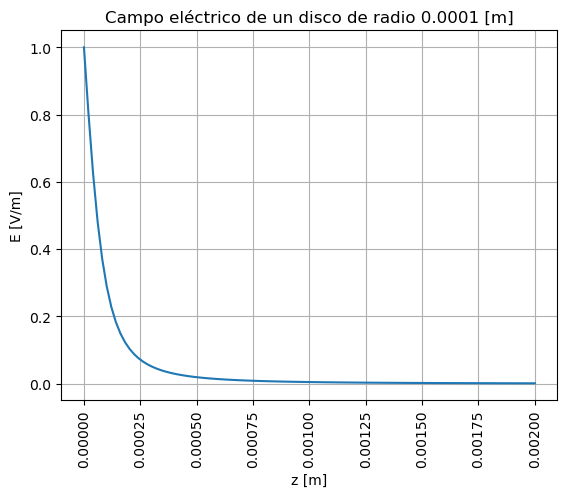

In [33]:
#Graficamos el potencial electrostático de un disco

z = np.linspace(0, 0.002, 100)
R= 0.1E-3 
kq =1
select ='disco'


try:
  gradV= derivative(potencial, z, dx = 1E-6, args=(R,kq, select, ))
  E = -gradV
except: 
  raise Exception('la palabra select debe ser un anillo o un disco')
  
plt.plot(z, E)
plt.title(f'Campo eléctrico de un {select} de radio {R} [m]')
plt.xlabel('z [m]')
plt.ylabel('E [V/m]')
plt.xticks(rotation=90)
plt.grid()
plt.show()

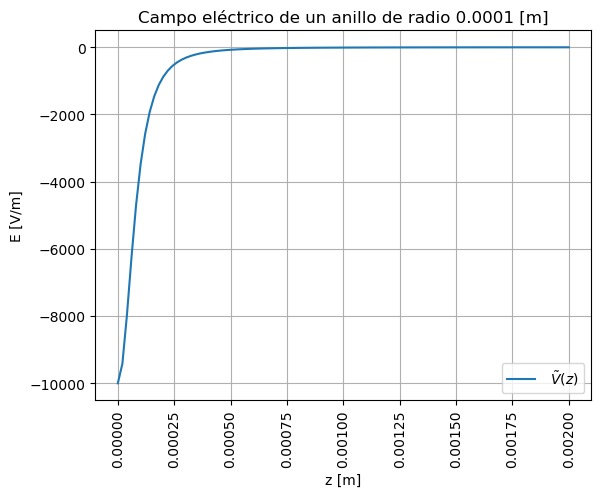

In [34]:
import numpy as np
from scipy.misc import derivative

z= np.linspace(0,0.002,100)
R= 0.1E-3
kq= 1
select= "anillo"

def potencial(z,R,kq,select):
  if(select=="anillo"):

    V= z*kq/np.sqrt(z**2+R**2)
  elif(select=="disco"):
    V= (2*kq/R**2)*(np.sqrt(z**2+R**2)- z)

  else:
     print("Error, lapalabra no es la correcta")

  return V



derivative = np.vectorize(derivative, excluded=['args'])
try:
  gradV= derivative(potencial,z, dx=1E-6, args=(R,kq, select))
  CampoEle= -gradV
  np.savetxt("campo_electrico.txt",CampoEle)
except:
  CampoEle = None
  
if CampoEle is not None:
  np.savetxt("campo_electrico.txt",CampoEle)
  plt.plot(z,CampoEle, label=' $\~{V}(z)$')
  plt.title(f"Campo eléctrico de un {select} de radio {R} [m]")
  plt.xlabel("z [m]")
  plt.ylabel("E [V/m]")
  plt.xticks(rotation=90)
  plt.legend()
  plt.grid()
  plt.show()
else :
  print("Error, la palabra no es la correcta")


In [35]:
!ls

Actividad_07_derivadas.ipynb  campo_electrico.txt
